## Synaptic matrix generation examples

In [1]:
import sys
sys.path.append('..')
from tmfc_simulation.synaptic_weights_matrices import generate_synaptic_weights_matrices
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Avenir'
matplotlib.rcParams['font.size'] = 16
plt.rcParams['image.cmap'] = 'plasma'
%load_ext autoreload
%autoreload 2

The fundamental procedures for function generation are implemented within the "generate_synaptic_weights_matrices" function. Our proposition advocates for the adoption of a matrix structure characterized by blockwise segmentation, aligning with the modular organization observed in the brain. The strength of correlations within and between these modules dictates the composition of the entire matrix.

The number of regions within each module may either be equivalent, unless explicitly specified by the user, or non-equivalent, with the user providing the requisite information, ensuring that the cumulative count aligns with the total number of regions. Two distinct generation approaches are facilitated: one entailing equal variance within each block, and the other contingent on variance proportional to a scaling factor.

In the former scenario, block weights are determined through a normal distribution, wherein the means are dictated by specified factors and a pre-defined standard deviation (sigma). In the latter scenario, a normal distribution is initially generated for each node within the matrix, subsequently being scaled by a factor derived from the factors matrix.

In [2]:
num_regions = 30
num_modules = 3
factors = np.array([[0.9, 0.5, 0.1],
           [0.5, 0.9, 0.1],
           [0.1, 0.1, 0.9]])

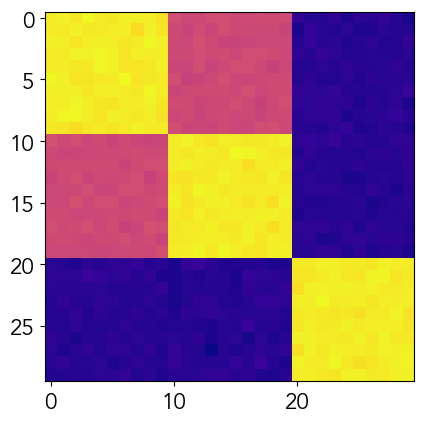

In [3]:
weight_matrix = generate_synaptic_weights_matrices(num_regions, 
                                                    num_modules, 
                                                    factors=factors)
plt.imshow(weight_matrix);

it is possible to return stats for matrix

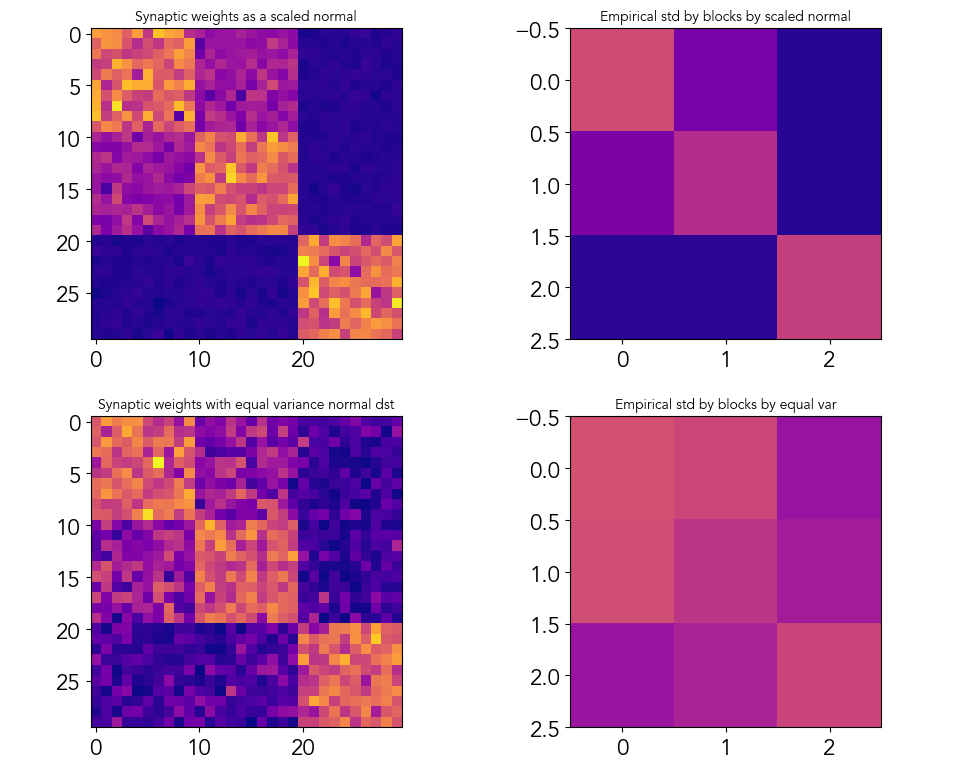

In [4]:
sigma = 0.2
num_regions = 30
num_modules = 3
factors = np.array([[0.9, 0.5, 0.1],
           [0.5, 0.9, 0.1],
           [0.1, 0.1, 0.9]])
weight_matrix_prod, stats_prod = generate_synaptic_weights_matrices(num_regions, 
                                                        num_modules, 
                                                        factors=factors, 
                                                        sigma=sigma,
                                                        return_stats = True,
                                                        gen_type = 'simple_prod')
weight_matrix_eqvar, stats_eqvar = generate_synaptic_weights_matrices(num_regions, 
                                                        num_modules, 
                                                        factors=factors, 
                                                        sigma=sigma,
                                                        return_stats = True,
                                                        gen_type = 'equal_var')
plt.subplots(figsize=(10,8)); plt.axis('off')
plt.subplot(221); plt.title("Synaptic weights as a scaled normal", fontsize=10)
plt.imshow(weight_matrix_prod)
plt.subplot(222);
plt.imshow(stats_prod['std'], vmin=0, vmax=2*sigma);  plt.title("Empirical std by blocks by scaled normal", fontsize=10)
plt.subplot(223);plt.imshow(weight_matrix_eqvar); plt.title("Synaptic weights with equal variance normal dst", fontsize=10)
plt.subplot(224); plt.imshow(stats_eqvar['std'], vmin=0, vmax=2*sigma); plt.title("Empirical std by blocks by equal var", fontsize=10)
        
plt.tight_layout()


Also it is possible to set any number of nodes in modules, but they should sum to total number of nodes in num_regions

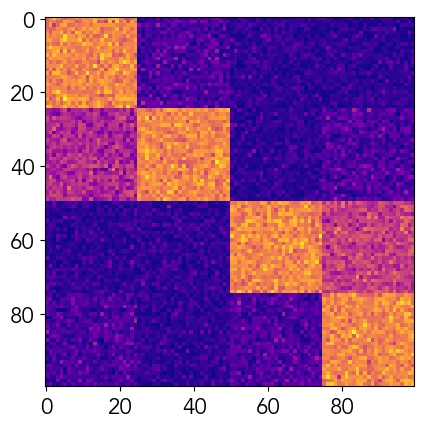

In [5]:
factors = np.array([[0.83, 0.15, 0.01, 0.01],
                    [0.45, 0.83, 0.01, 0.15],
                    [0.01, 0.01, 0.83, 0.55],
                    [0.15, 0.01, 0.15, 0.83]])
num_regions=100
sigma=0.1
num_modules=4
num_regions_per_modules = [15,25,25,35]
weight_matrix = generate_synaptic_weights_matrices(num_regions, 
                                                        num_modules, 
                                                        factors=factors, 
                                                        sigma=sigma,
                                                        return_stats = False,
                                                        gen_type = 'equal_var')
plt.imshow(weight_matrix);